# Modelación de flujo de agua subterránea en un medio heterogéneo/Planta

In [1]:
from __future__ import print_function
from fenics import *
import numpy as np
import random as ra
import sys
import scipy

ModuleNotFoundError: No module named 'scipy'

In [159]:
# Se definen las condiciones de fronteras

mesh= RectangleMesh(Point(0,0),Point(200,100),20,10)
V = FunctionSpace(mesh, 'P', 1)

# Se definen las condiciones de fronteras

def frontera_I(x,frontera):
 tol=1E-14 
 if frontera:
  if abs(x[0])<=tol: 
   return True
  else:
   return False 
 else:
  return False  

def frontera_D(x,frontera):
 tol=1E-14 
 if frontera:
  if abs(x[0]-200)<=tol: 
   return True
  else:
   return False 
 else:
  return False 

F_I = DirichletBC(V,Constant(100), frontera_I)
F_D = DirichletBC(V,Constant(10), frontera_D)
bc = [F_I,F_D]

In [66]:
# Se define la heterogeneidad

class K(UserExpression):
 def set_k_values(self, k_0, k_1):
     self.k_0, self.k_1 = k_0, k_1
 def eval(self, value, x):
   tol = 1E-14 
   if  x[0] <= 2*x[1] + tol:
      value[0] = self.k_0
   else:
      value[0] = self.k_1

kappa = K(degree=1)
kappa.set_k_values(10,100)

In [67]:
#Se define el problema variacional

u=TrialFunction(V)
v=TestFunction(V)
f=Constant(0)
a=kappa*dot(grad(u),grad(v))*dx
g=Constant(0)
L=f*v*dx-g*v*ds

In [68]:
# Se realiza el calculo de la solucion

u= Function(V)
solve(a==L,u,bc)


In [69]:
# Se organizan los valores para la exportación de los datos

tau=project(grad(u))
xx=np.loadtxt("Coordenadascentroide.csv",delimiter=',',skiprows=1,usecols=[1])
yy=np.loadtxt("Coordenadascentroide.csv",delimiter=',',skiprows=1,usecols=[2])
datos=np.zeros((400,7))
datos[:,0]=xx
datos[:,1]=yy
datos[:,4]=1
for i in range(0,399):
 datos[i,2]=tau(xx[i],yy[i])[0]
 datos[i,3]=tau(xx[i],yy[i])[1]

np.savetxt("SoluciónFlujo3.2",datos)


In [70]:
for i in range (0,399): 
 if (datos[i,0]<2*datos[i,1]):
  datos[i,4]=100
 else:
  datos[i,4]=10
# Se aplica la ecuación de Darcy
datos[:,5]=datos[:,4]*datos[:,2]
datos[:,6]=datos[:,4]*datos[:,3]
  

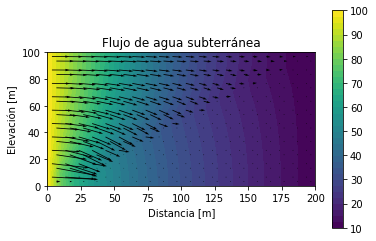

In [71]:
## Ploteando los resultados de la simulación, flujo en un medio de alta conductividad tratando de entrar a un medio de
## baja conductividad
import matplotlib.pyplot as plt
carga=plot(u)
flujo=plt.quiver(xx,yy,-datos[:,5],-datos[:,6])
plt.colorbar(carga)
plt.title('Flujo de agua subterránea')
plt.ylabel('Elevación [m]')
#plt.colorbar(im)
#plot(mesh)
plt.title('Flujo de agua subterránea')
plt.ylabel('Elevación [m]')
plt.xlabel('Distancia [m]')
plt.show()


In [72]:
### Invirtiendo los valores de conductividad

kappa2 = K(degree=1)
kappa2.set_k_values(100,10)

In [73]:
# Se redefine la ecuación

u=TrialFunction(V)
v=TestFunction(V)
f=Constant(0)
a=kappa2*dot(grad(u),grad(v))*dx
g=Constant(0)
L=f*v*dx-g*v*ds

# Se realiza el calculo de la solucion

u= Function(V)
solve(a==L,u,bc)
tau=project(grad(u))

In [74]:
# Se organizan los valores para la exportación de los datos de esta simulación

tau=project(grad(u))
xx=np.loadtxt("Coordenadascentroide.csv",delimiter=',',skiprows=1,usecols=[1])
yy=np.loadtxt("Coordenadascentroide.csv",delimiter=',',skiprows=1,usecols=[2])
datos=np.zeros((400,7))
datos[:,0]=xx
datos[:,1]=yy
datos[:,4]=1
for i in range(0,399):
 datos[i,2]=tau(xx[i],yy[i])[0]
 datos[i,3]=tau(xx[i],yy[i])[1]

np.savetxt("SoluciónFlujo3.3",datos)

In [77]:
for i in range (0,399): 
 if (datos[i,0]<2*datos[i,1]):
  datos[i,4]=100
 else:
  datos[i,4]=10
# Se aplica la ecuación de Darcy
datos[:,5]=datos[:,4]*datos[:,2]
datos[:,6]=datos[:,4]*datos[:,3]

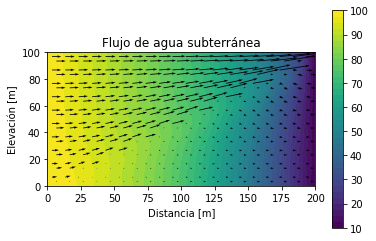

In [78]:
## Ploteando los resultados de la simulación, flujo en un medio de alta conductividad tratando de entrar a un medio de
## baja conductividad
import matplotlib.pyplot as plt
carga=plot(u)
flujo=plt.quiver(xx,yy,-datos[:,5],-datos[:,6])
plt.colorbar(carga)
plt.title('Flujo de agua subterránea')
plt.ylabel('Elevación [m]')
#plt.colorbar(im)
#plot(mesh)
plt.title('Flujo de agua subterránea')
plt.ylabel('Elevación [m]')
plt.xlabel('Distancia [m]')
plt.show()